# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [89]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [92]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [101]:
sinasc_lat = sinasc_raw[['munResLat','munResLon','QTDFILVIVO']]

In [102]:
sinasc_lat['faixas_lat'] = sinasc_lat['munResLat'].apply(
    lambda x: 'acima de -10.5' if x >= -10.5 else 'abaixo de -10.5'
)

sinasc_lat.head()

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_53276/4159269357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_lat['faixas_lat'] = sinasc_lat['munResLat'].apply(


,munResLat,munResLon,QTDFILVIVO,faixas_lat
0,-11.93554,-61.99982,0.0,abaixo de -10.5
1,-11.93554,-61.99982,1.0,abaixo de -10.5
2,-11.93554,-61.99982,2.0,abaixo de -10.5
3,-12.13178,-61.85308,0.0,abaixo de -10.5
4,-11.93554,-61.99982,1.0,abaixo de -10.5


In [108]:
agrup = sinasc_lat.groupby(['faixas_lat'])
agrup.agg([sum, np.mean, min, max, np.median, np.var, np.std])

munResLat                                           \
                          sum       mean       min       max    median   
faixas_lat                                                               
abaixo de -10.5 -150874.73529 -11.612001 -13.49976 -10.56842 -11.52855   
acima de -10.5  -129611.14031  -9.235509 -10.43595  -8.76889  -8.76889   

                                        munResLon                       ...  \
                      var       std           sum       mean       min  ...   
faixas_lat                                                              ...   
abaixo de -10.5  0.545920  0.738864 -804257.01023 -61.899254 -65.32395  ...   
acima de -10.5   0.409534  0.639948 -891822.01897 -63.547244 -65.32915  ...   

                                              QTDFILVIVO                       \
                   median       var       std        sum      mean  min   max   
faixas_lat                                                                      
abaixo de -10.5 -61.90944  1.516548  1.231482    12601.0  0.980012  0.0  30.0   
acima de -10.5  -63.83145  0.394002  0.627696    14226.0  1.129317  0.0  12.0   

                                            
                median       var       std  
faixas_lat                                  
abaixo de -10.5    1.0  1.295626  1.138256  
acima de -10.5     1.0  1.436674  1.198613  

[2 rows x 21 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [96]:
sinasc_area = sinasc_raw[['munResArea','munResAlt','LOCNASC']]

In [98]:
valor_max = sinasc_area['munResArea'].max()

valor_max

34096.394

In [107]:
sinasc_area_agg = pd.cut(sinasc_area['munResArea'], [0, 3000, valor_max])

In [106]:
agrupamento = sinasc_area.groupby([sinasc_area_agg])
agrupamento.agg([sum, np.mean, min, max, np.median, np.var, np.std])

munResArea                                     \
                              sum          mean       min        max   
munResArea                                                             
(0.0, 3000.0]        9.665178e+06   1851.921453   459.978   2944.128   
(3000.0, 34096.394]  3.877074e+08  17778.218601  3029.189  34096.394   

                                                            munResAlt  \
                        median           var           std        sum   
munResArea                                                              
(0.0, 3000.0]         1758.465  5.039353e+05    709.884005  1136462.0   
(3000.0, 34096.394]  10959.767  1.837162e+08  13554.195564  3704398.0   

                                        ...                                   \
                           mean    min  ... median           var         std   
munResArea                              ...                                    
(0.0, 3000.0]        217.754742  124.0  ...  227.0   3507.765441   59.226391   
(3000.0, 34096.394]  169.864178   85.0  ...  139.0  17509.738052  132.324367   

                    LOCNASC                                               
                        sum      mean min max median       var       std  
munResArea                                                                
(0.0, 3000.0]          5258  1.007473   1   4    1.0  0.015851  0.125899  
(3000.0, 34096.394]   22077  1.012335   1   4    1.0  0.028600  0.169116  

[2 rows x 21 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [109]:
sinasc_altura = sinasc_raw[['munResAlt','CONSULTAS','IDADEMAE']]

In [112]:
#pensei em usar as faixas dadas pelo describe

sinasc_altura[['munResAlt']].describe()

,munResAlt
count,27027.000000
mean,179.111999
std,123.138365
min,85.000000
25%,87.000000
50%,153.000000
75%,191.000000
max,595.000000


In [114]:
sinasc_altura_agregado = pd.cut(sinasc_altura['munResAlt'], [0, 87, 153, 191, 595])

In [115]:
sinasc_altura.groupby([sinasc_altura_agregado]).agg([sum, np.mean, 
                                            min, max, np.median, np.var, np.std])

munResAlt                                                 \
                  sum        mean    min    max median           var   
munResAlt                                                              
(0, 87]      762664.0   86.923182   85.0   87.0   87.0      0.147752   
(87, 153]    673094.0  138.839521   99.0  153.0  139.0    123.596276   
(153, 191]  1173454.0  169.134333  154.0  191.0  163.0    143.787920   
(191, 595]  2231648.0  345.082418  192.0  595.0  263.0  22724.402578   

                       CONSULTAS                ...                   \
                   std       sum      mean min  ... median       var   
munResAlt                                       ...                    
(0, 87]       0.384385     29285  3.337702   1  ...    4.0  0.965962   
(87, 153]    11.117386     17294  3.567244   1  ...    4.0  0.547984   
(153, 191]   11.991160     25991  3.746180   1  ...    4.0  0.336460   
(191, 595]  150.746153     24092  3.725375   1  ...    4.0  0.384823   

                     IDADEMAE                                                 
                 std      sum       mean min max median        var       std  
munResAlt                                                                     
(0, 87]     0.982834   230507  26.271598  12  47   26.0  42.812240  6.543106  
(87, 153]   0.740259   123266  25.426155  11  46   25.0  40.823100  6.389296  
(153, 191]  0.580052   181314  26.133468  12  52   26.0  38.939370  6.240142  
(191, 595]  0.620341   170150  26.310499  13  53   26.0  39.626433  6.294953  

[4 rows x 21 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [116]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [118]:
sinasc_1 = sinasc_raw[['munResNome','IDADEMAE','DTNASC']]
sinasc_1.head()

,munResNome,IDADEMAE,DTNASC
0,Alta Floresta D'Oeste,19,2019-02-19
1,Alta Floresta D'Oeste,29,2019-02-21
2,Alta Floresta D'Oeste,37,2019-02-25
3,Alto Alegre dos Parecis,30,2019-03-20
4,Alta Floresta D'Oeste,30,2019-03-23


In [119]:
sinasc_1['DTNASC'] = pd.to_datetime(sinasc_1['DTNASC'])

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_53276/1084508172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_1['DTNASC'] = pd.to_datetime(sinasc_1['DTNASC'])


In [120]:
sinasc_1['REGIAO'] = sinasc_1['munResNome'].map(imediatas)

sinasc_1.head()

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_53276/734122143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_1['REGIAO'] = sinasc_1['munResNome'].map(imediatas)


,munResNome,IDADEMAE,DTNASC,REGIAO
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal


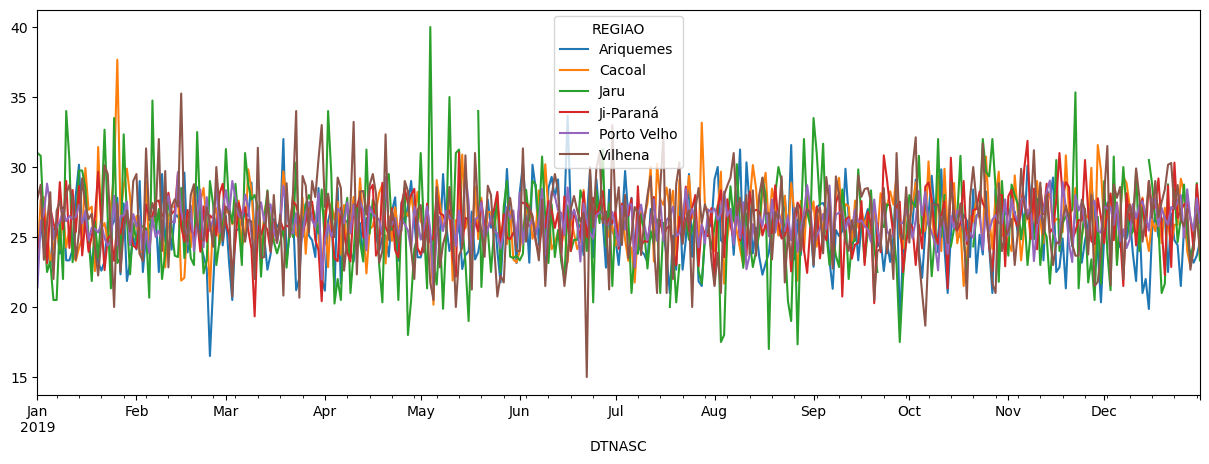

In [121]:
sinasc_1.groupby(['DTNASC', 'REGIAO'])['IDADEMAE'].mean().unstack().plot(figsize=[15,5]);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [145]:
municipios_por_idh = {
    "IDH-M muito alto": [],
    "IDH-M alto": [
        "Porto Velho",
        "Vilhena",
        "Cacoal",
        "Ji-Paraná",
        "Pimenta Bueno",
        "Ariquemes",
        "Rolim de Moura"
    ],
    "IDH-M médio": [
        "Cerejeiras",
        "Jaru",
        "Colorado do Oeste",
        "Ouro Preto do Oeste",
        "Espigão D'Oeste",
        "Santa Luzia D'Oeste",
        "Pimenteiras do Oeste",
        "Presidente Médici",
        "Castanheiras",
        "Guajará-Mirim",
        "Chupinguaia",
        "Cabixi",
        "Candeias do Jamari",
        "São Felipe D'Oeste",
        "Cacaulândia",
        "São Miguel do Guaporé",
        "Mirante da Serra",
        "Alvorada D'Oeste",
        "Teixeirópolis",
        "Nova Brasilândia D'Oeste",
        "Rio Crespo",
        "Primavera de Rondônia",
        "Alta Floresta D'Oeste",
        "Ministro Andreazza",
        "Novo Horizonte do Oeste",
        "Vale do Paraíso",
        "Alto Paraíso",
        "Parecis",
        "Buritis",
        "Itapuã do Oeste",
        "Corumbiara",
        "Cujubim",
        "Costa Marques",
        "São Francisco do Guaporé",
        "Urupá",
        "Monte Negro"
    ],
    "IDH-M baixo": [
        "Seringueiras",
        "Governador Jorge Teixeira",
        "Machadinho D'Oeste",
        "Campo Novo de Rondônia",
        "Alto Alegre dos Parecis",
        "Theobroma",
        "Nova União",
        "Nova Mamoré",
        "Vale do Anari"
    ],
    "IDH-M muito baixo": []
}

print(municipios_por_idh["IDH-M alto"])

['Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura']


In [157]:
sinasc_2 = sinasc_raw[['munResNome','APGAR5']]

In [158]:
municipios_idh_dict = {}

for idh_categoria, lista_municipios in municipios_por_idh.items():
    for municipio in lista_municipios:
        municipios_idh_dict[municipio] = idh_categoria


sinasc_2['IDH'] = sinasc_2['munResNome'].map(municipios_idh_dict)

sinasc_2.head()


/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_53276/335724265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_2['IDH'] = sinasc_2['munResNome'].map(municipios_idh_dict)


,munResNome,APGAR5,IDH
0,Alta Floresta D'Oeste,10.0,IDH-M médio
1,Alta Floresta D'Oeste,9.0,IDH-M médio
2,Alta Floresta D'Oeste,10.0,IDH-M médio
3,Alto Alegre dos Parecis,10.0,IDH-M baixo
4,Alta Floresta D'Oeste,10.0,IDH-M médio


In [159]:
#verifiquei antes os nulos, apenas o Município ignorado está nulo

sinasc_2.isna().sum()

munResNome      0
APGAR5        103
IDH             1
dtype: int64

In [167]:
sinasc_2.groupby(['IDH'])['APGAR5'].agg([np.mean,min,max,np.var,np.std])

,mean,min,max,var,std
IDH,,,,,
IDH-M alto,9.171668,0.0,10.0,0.575125,0.758370
IDH-M baixo,9.172527,1.0,10.0,0.740971,0.860797
IDH-M médio,9.195668,0.0,10.0,0.700186,0.836771


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [170]:
desenvolvimento_municipios = {
    "Desenvolvimento alto": [],
    "Desenvolvimento moderado": [
        "Ariquemes", "Vilhena", "Pimenta Bueno", "Porto Velho", "Ji-Paraná", "Cacoal",
        "Santa Luzia D'Oeste", "Rolim de Moura", "Chupinguaia", "São Miguel do Guaporé",
        "Pimenteiras do Oeste", "Teixeirópolis", "Colorado do Oeste", "Jaru", "Rio Crespo",
        "Primavera de Rondônia", "Alta Floresta D'Oeste", "Ouro Preto do Oeste",
        "São Francisco do Guaporé", "Candeias do Jamari", "Buritis", "São Felipe D'Oeste",
        "Presidente Médici", "Cerejeiras", "Monte Negro", "Urupá"
    ],
    "Desenvolvimento regular": [
        "Espigão D'Oeste", "Seringueiras", "Alvorada D'Oeste", "Itapuã do Oeste", "Cabixi",
        "Novo Horizonte do Oeste", "Nova Brasilândia D'Oeste", "Vale do Paraíso", "Corumbiara",
        "Alto Paraíso", "Cacaulândia", "Vale do Anari", "Ministro Andreazza", "Costa Marques",
        "Nova União", "Guajará-Mirim", "Mirante da Serra", "Parecis", "Castanheiras",
        "Theobroma", "Machadinho D'Oeste", "Campo Novo de Rondônia", "Nova Mamoré", "Cujubim",
        "Alto Alegre dos Parecis", "Governador Jorge Teixeira"
    ],
    "Desenvolvimento baixo": []
}

In [171]:
municipios_ifdm_dict = {}

for ifdm_categoria, lista_municipios in desenvolvimento_municipios.items():
    for municipio in lista_municipios:
        municipios_ifdm_dict[municipio] = ifdm_categoria


sinasc_2['IFDM'] = sinasc_2['munResNome'].map(municipios_ifdm_dict)

sinasc_2.head()

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_53276/2652305733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_2['IFDM'] = sinasc_2['munResNome'].map(municipios_ifdm_dict)


,munResNome,APGAR5,IDH,IFDM
0,Alta Floresta D'Oeste,10.0,IDH-M médio,Desenvolvimento moderado
1,Alta Floresta D'Oeste,9.0,IDH-M médio,Desenvolvimento moderado
2,Alta Floresta D'Oeste,10.0,IDH-M médio,Desenvolvimento moderado
3,Alto Alegre dos Parecis,10.0,IDH-M baixo,Desenvolvimento regular
4,Alta Floresta D'Oeste,10.0,IDH-M médio,Desenvolvimento moderado


In [172]:
#CORRIGI OS NOMES NOVAMENTE

sinasc_2.isna().sum()

munResNome      0
APGAR5        103
IDH             1
IFDM            1
dtype: int64

In [177]:
sinasc_2.groupby(['IFDM'])['APGAR5'].agg([np.mean,min,max,np.var,np.std])

,mean,min,max,var,std
IFDM,,,,,
Desenvolvimento moderado,9.185394,0.0,10.0,0.598574,0.773676
Desenvolvimento regular,9.152066,0.0,10.0,0.738541,0.859384


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [178]:
municipios_por_pib = {
    "Acima de 1 Bilhão": [
        "Porto Velho",
        "Ji-Paraná",
        "Vilhena",
        "Ariquemes",
        "Cacoal",
        "Jaru",
        "Rolim de Moura",
        "Pimenta Bueno"
    ],
    "Acima de 500 Milhões": [
        "Guajará-Mirim",
        "Ouro Preto do Oeste",
        "Buritis",
        "Machadinho D'Oeste",
        "Espigão D'Oeste",
        "São Miguel do Guaporé",
        "Candeias do Jamari",
        "Nova Mamoré",
        "Cerejeiras"
    ],
    "Acima de 300 Milhões": [
        "Alta Floresta D'Oeste",
        "Presidente Médici",
        "Cujubim",
        "Nova Brasilândia D'Oeste"
        "Alto Paraíso",
        "São Francisco do Guaporé",
        "Colorado do Oeste"
    ],
    "Acima de 200 Milhões": [
        "Monte Negro",
        "Alto Alegre dos Parecis",
        "Campo Novo de Rondônia",
        "Alvorada D'Oeste"
    ],
    "Acima de 100 Milhões": [
        "Chupinguaia",
        "Corumbiara",
        "Ministro Andreazza",
        "Urupá",
        "Costa Marques",
        "Seringueiras",
        "Mirante da Serra",
        "Governador Jorge Teixeira",
        "Theobroma",
        "Santa Luzia D'Oeste",
        "Novo Horizonte do Oeste",
        "Itapuã do Oeste",
        "Vale do Paraíso",
        "Cacaulândia",
        "Cabixi",
        "Vale do Anari"
    ],
    "Até 100 Milhões": [
        "Nova União",
        "Parecis",
        "Rio Crespo",
        "Pimenteiras do Oeste",
        "Teixeirópolis",
        "São Felipe D'Oeste",
        "Castanheiras",
        "Primavera de Rondônia"
    ]
}

In [179]:
municipios_pib_dict = {}

for pib_categoria, lista_municipios in desenvolvimento_municipios.items():
    for municipio in lista_municipios:
        municipios_pib_dict[municipio] = pib_categoria


sinasc_2['PIB'] = sinasc_2['munResNome'].map(municipios_pib_dict)

sinasc_2.head()

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_53276/3910809901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_2['PIB'] = sinasc_2['munResNome'].map(municipios_pib_dict)


,munResNome,APGAR5,IDH,IFDM,PIB
0,Alta Floresta D'Oeste,10.0,IDH-M médio,Desenvolvimento moderado,Desenvolvimento moderado
1,Alta Floresta D'Oeste,9.0,IDH-M médio,Desenvolvimento moderado,Desenvolvimento moderado
2,Alta Floresta D'Oeste,10.0,IDH-M médio,Desenvolvimento moderado,Desenvolvimento moderado
3,Alto Alegre dos Parecis,10.0,IDH-M baixo,Desenvolvimento regular,Desenvolvimento regular
4,Alta Floresta D'Oeste,10.0,IDH-M médio,Desenvolvimento moderado,Desenvolvimento moderado


In [180]:
sinasc_2.isna().sum()

munResNome      0
APGAR5        103
IDH             1
IFDM            1
PIB             1
dtype: int64

In [181]:
sinasc_2.groupby(['PIB'])['APGAR5'].agg([np.mean,min,max,np.var,np.std])

,mean,min,max,var,std
PIB,,,,,
Desenvolvimento moderado,9.185394,0.0,10.0,0.598574,0.773676
Desenvolvimento regular,9.152066,0.0,10.0,0.738541,0.859384


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- Não há diferença significativa entre o APGAR5 em diferentes faixas de IDH